In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import json

import sys

sys.path.append("../")

##################################################################
os.environ["TOKENIZERS_PARALLELISM"] = "false"
os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6,7"
##################################################################

import logging
from src.utils import logging_utils
from src.utils import env_utils

logger = logging.getLogger(__name__)

logging.basicConfig(
    level=logging.DEBUG,
    format=logging_utils.DEFAULT_FORMAT,
    datefmt=logging_utils.DEFAULT_DATEFMT,
    stream=sys.stdout,
)

import torch
import transformers

logger.info(f"{torch.__version__=}, {torch.version.cuda=}")
logger.info(
    f"{torch.cuda.is_available()=}, {torch.cuda.device_count()=}, {torch.cuda.get_device_name()=}"
)
logger.info(f"{transformers.__version__=}")

2025-07-24 16:56:49 __main__ INFO     torch.__version__='2.7.0+cu126', torch.version.cuda='12.6'
2025-07-24 16:56:50 __main__ INFO     torch.cuda.is_available()=True, torch.cuda.device_count()=8, torch.cuda.get_device_name()='NVIDIA A100 80GB PCIe'
2025-07-24 16:56:50 __main__ INFO     transformers.__version__='4.51.3'


In [3]:
from src.utils.training_utils import get_device_map

# model_key = "meta-llama/Llama-3.2-3B"
# model_key = "meta-llama/Llama-3.1-8B"
model_key = "meta-llama/Llama-3.3-70B-Instruct"
# model_key = "meta-llama/Llama-3.1-405B-Instruct"

# model_key = "google/gemma-2-9b-it"
# model_key = "google/gemma-3-12b-it"
# model_key = "google/gemma-2-27b-it"

# model_key = "deepseek-ai/DeepSeek-R1-Distill-Llama-8B"

# model_key = "allenai/OLMo-2-1124-7B-Instruct"
# model_key = "allenai/OLMo-7B-0424-hf"

# model_key = "Qwen/Qwen2-7B"
# model_key = "Qwen/Qwen2.5-14B-Instruct"
# model_key = "Qwen/Qwen2.5-32B-Instruct"
# model_key = "Qwen/Qwen2.5-72B-Instruct"

# model_key = "Qwen/Qwen3-1.7B"
# model_key = "Qwen/Qwen3-4B"
# model_key = "Qwen/Qwen3-8B"
# model_key = "Qwen/Qwen3-14B"
# model_key = "Qwen/Qwen3-32B"

# device_map = get_device_map(model_key, 30, n_gpus=8)
# device_map

[2025-07-24 16:56:53,098] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)
2025-07-24 16:56:53 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmp2xyq94tb/test.c -o /tmp/tmp2xyq94tb/test.o
2025-07-24 16:56:53 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmp2xyq94tb/test.o -laio -o /tmp/tmp2xyq94tb/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -laio: No such file or directory
collect2: error: ld returned 1 exit status


2025-07-24 16:56:53 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -O2 -isystem /disk/u/arnab/miniconda3/envs/connection/include -fPIC -c /tmp/tmplpl4pelj/test.c -o /tmp/tmplpl4pelj/test.o
2025-07-24 16:56:53 root INFO     gcc -pthread -B /disk/u/arnab/miniconda3/envs/connection/compiler_compat /tmp/tmplpl4pelj/test.o -L/usr -L/usr/lib64 -lcufile -o /tmp/tmplpl4pelj/a.out


/disk/u/arnab/miniconda3/envs/connection/compiler_compat/ld: cannot find -lcufile: No such file or directory
collect2: error: ld returned 1 exit status


2025-07-24 16:56:54 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-07-24 16:56:54 git.cmd DEBUG    Popen(['git', 'version'], cwd=/disk/u/arnab/Codes/Projects/retrieval/notebooks, stdin=None, shell=False, universal_newlines=False)
2025-07-24 16:56:54 wandb.docker.auth DEBUG    Trying paths: ['/disk/u/arnab/.docker/config.json', '/disk/u/arnab/.dockercfg']
2025-07-24 16:56:54 wandb.docker.auth DEBUG    No config file found


In [4]:
# os.environ["BNB_CUDA_VERSION"] = "124"
# ! echo $BNB_CUDA_VERSION
# ! python -m bitsandbytes

In [5]:
from src.models import ModelandTokenizer

# from transformers import BitsAndBytesConfig

mt = ModelandTokenizer(
    model_key=model_key,
    torch_dtype=torch.bfloat16,
    # device_map=device_map,
    device_map="auto",
    # quantization_config = BitsAndBytesConfig(
    #     # load_in_4bit=True
    #     load_in_8bit=True
    # )
)

2025-07-24 16:56:55 src.models WARNING  meta-llama/Llama-3.3-70B-Instruct not found in /disk/u/arnab/Codes/Models
If not found in cache, model will be downloaded from HuggingFace to cache directory
2025-07-24 16:56:55 urllib3.connectionpool DEBUG    Starting new HTTPS connection (1): huggingface.co:443


2025-07-24 16:56:55 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/config.json HTTP/1.1" 200 0
2025-07-24 16:56:55 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/tokenizer_config.json HTTP/1.1" 200 0


Loading checkpoint shards:   0%|          | 0/30 [00:00<?, ?it/s]

2025-07-24 16:57:44 urllib3.connectionpool DEBUG    https://huggingface.co:443 "HEAD /meta-llama/Llama-3.3-70B-Instruct/resolve/main/generation_config.json HTTP/1.1" 200 0
2025-07-24 16:57:45 src.models INFO     loaded model <meta-llama/Llama-3.3-70B-Instruct> | size: 134570.516 MB | dtype: torch.bfloat16 | device: cuda:0


In [6]:
from src.functional import free_gpu_cache

# SYNTH_DATASET = "icosahedron_1"
SYNTH_DATASET = "64"

checkpoint_path = os.path.join(
    env_utils.DEFAULT_RESULTS_DIR,
    "trained_params",
    f"{SYNTH_DATASET}",
    "_full__clamp=0.001",
    model_key.split("/")[-1],
)

version = "epoch_1"
# version = "final_model"

checkpoint_path = os.path.join(env_utils.DEFAULT_RESULTS_DIR, checkpoint_path, version)

print(os.listdir(checkpoint_path))

checkpoint_path = os.path.join(checkpoint_path, "trainable_params.pt")

loaded_deltas = torch.load(checkpoint_path, map_location="cpu")
# loaded_deltas

free_gpu_cache()


d = loaded_deltas["model<>layers<>10<>mlp<>gate_proj"]
d.abs().max()

['trainable_params.pt']


tensor(0.0010, dtype=torch.bfloat16, grad_fn=<MaxBackward1>)

In [7]:
from src.utils.training_utils import TrainableLM_delta, TrainableLM_LoRA

#################################################
Trainable_CLS = TrainableLM_delta
# Trainable_CLS = TrainableLM_LoRA
#################################################

Trainable_CLS.fuse_with_model(mt._model, loaded_deltas)

2025-07-24 16:57:58 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])


2025-07-24 16:57:59 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-24 16:57:59 src.utils.training_utils DEBUG    module_name='model.layers.0.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-07-24 16:57:59 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-24 16:57:59 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-24 16:57:59 src.utils.training_utils DEBUG    module_name='model.layers.1.mlp.down_proj' | param_delta.shape=torch.Size([8192, 28672])
2025-07-24 16:57:59 src.utils.training_utils DEBUG    module_name='model.layers.2.mlp.gate_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-07-24 16:57:59 src.utils.training_utils DEBUG    module_name='model.layers.2.mlp.up_proj' | param_delta.shape=torch.Size([28672, 8192])
2025-

In [8]:
from src.selection.data  import load_people_by_category

people_by_category = load_people_by_category(tokenizer = mt.tokenizer)
list(people_by_category.keys())

2025-07-24 16:58:03 src.selection.data INFO     Loaded 16 categories


['actor',
 'singer',
 'comedian',
 'director',
 'basketball player',
 'football player',
 'soccer player',
 'tennis player',
 'golfer',
 'boxer',
 'news anchor',
 'journalist',
 'author',
 'fashion designer',
 'entrepreneur',
 'politician']

In [30]:
import copy
import random
import itertools
from src.selection.utils import KeyedSet, get_first_token_id
from src.selection.data import SelectionSample, get_random_sample
from src.functional import predict_next_token, get_hs, PatchSpec
from src.utils import experiment_utils
from src.tokens import find_token_range, prepare_input

######################################################################
N_DISTRACTORS = 5
N_SAMPLES = 100
bare_prompt_template = " {} is a person"
######################################################################


experiment_utils.set_seed(123456)

evolution_of_scores = []
effects = []
for run_idx in range(N_SAMPLES):
    print(f"run {run_idx + 1}/{N_SAMPLES}...")
    sample = get_random_sample(
        people_by_category=people_by_category,
        mt = mt,
        n_distractors=N_DISTRACTORS,
        filter_by_lm_prediction= True,
    )
    print(f"{str(sample)}")
    print(f"clean_prediction={[str(p) for p in sample.prediction]}")

    tokenized = prepare_input(tokenizer=mt, prompts=sample.prompt, return_offsets_mapping=True)
    offsets = tokenized.pop("offset_mapping")[0]
    
    patches = []
    for obj in sample.options:
        obj_range = find_token_range(
            string = sample.prompt,
            substring=obj,
            offset_mapping=offsets,
            tokenizer=mt.tokenizer,
        )

        bare_prompt = bare_prompt_template.format(obj)
        bare_tokenized = prepare_input(
            tokenizer=mt.tokenizer,
            prompts=bare_prompt,
            return_offsets_mapping=True,
        )
        bare_offsets = bare_tokenized.pop("offset_mapping")[0]
        bare_obj_range = find_token_range(
            string=bare_prompt,
            substring=obj,
            offset_mapping=bare_offsets,
            tokenizer=mt.tokenizer,
        )
        print(f"{obj=}, {bare_obj_range=}, {obj_range=}")
        assert obj_range[1] - obj_range[0] == bare_obj_range[1] - bare_obj_range[0]

        bare_hs = get_hs(
            mt = mt,
            input = bare_tokenized,
            locations = list(itertools.product(mt.layer_names, list(range(*bare_obj_range)))),
            return_dict=True
        )

        for bare_idx, clean_idx in zip(range(*bare_obj_range), range(*obj_range)):
            patches.extend(
                [
                    PatchSpec(
                        location = (module_name, clean_idx),
                        patch = bare_hs[(module_name, bare_idx)],
                    ) for module_name in mt.layer_names
                ]
            )

    # patched_run
    clean_answer = sample.prediction[0]
    patched_pred, track = predict_next_token(
        mt=mt,
        inputs=tokenized,
        patches=patches,
        token_of_interest=[clean_answer.token_id]
    )
    patched_pred, track = patched_pred[0], track[0]
    pred_fmt = [str(p) for p in patched_pred]
    effects.append({
        "answer": clean_answer,
        "clean_score": sample.prediction[0],
        "patch_score": track[clean_answer.token_id][1],
        "rank": track[clean_answer.token_id][0],
    })

    print("=" * 100)


2025-07-24 17:21:07 src.utils.experiment_utils INFO     setting all seeds to 123456


run 1/100...
Canelo Álvarez -> George Kambosos Jr. (0): ['George Kambosos Jr.', 'Clint Eastwood', 'Brooks Koepka', 'Peter Baker', 'Russell Westbrook', 'Julia Roberts']
clean_prediction=['" George"[10058] (p=0.914, logit=21.125)', '" C"[356] (p=0.031, logit=17.750)', '" The"[578] (p=0.021, logit=17.375)', '" None"[2290] (p=0.004, logit=15.625)', '" Clint"[56129] (p=0.003, logit=15.250)']
obj='George Kambosos Jr.', bare_obj_range=(1, 7), obj_range=(22, 28)
obj='Clint Eastwood', bare_obj_range=(1, 4), obj_range=(28, 31)
obj='Brooks Koepka', bare_obj_range=(1, 5), obj_range=(32, 36)
obj='Peter Baker', bare_obj_range=(1, 3), obj_range=(37, 39)
obj='Russell Westbrook', bare_obj_range=(1, 3), obj_range=(40, 42)
obj='Julia Roberts', bare_obj_range=(1, 3), obj_range=(43, 45)
run 2/100...
Al Pacino -> Ryan Reynolds (3): ['Erling Haaland', 'Cameron Smith', 'Robin Roberts', 'Ryan Reynolds', 'Gary Vaynerchuk', 'Kawhi Leonard']
clean_prediction=['" Ryan"[13960] (p=0.543, logit=19.875)', '" Robin"[17

mean indirect effect: 0.859 +/- 0.311
mean rank: 1.680 +/- 3.072


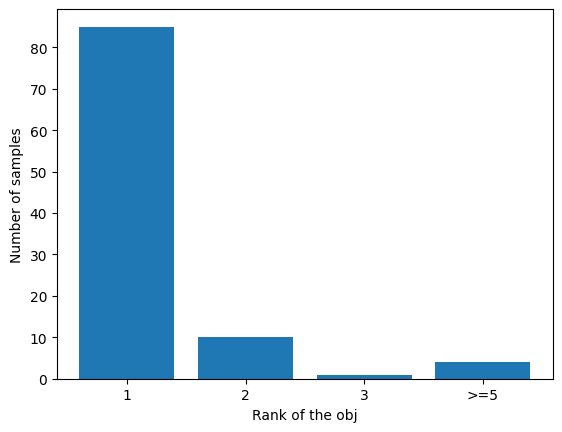

In [42]:
import numpy as np
from matplotlib import pyplot as plt

METRIC = "prob"
indirect_effects = []
ranks = []
for effect in effects:
    clean_score = getattr(effect["clean_score"], METRIC)
    patch_score = getattr(effect["patch_score"], METRIC)
    ie = patch_score / clean_score
    indirect_effects.append(ie)
    ranks.append(effect["rank"])
    # print(f"{effect['answer'].token}, {clean_score=:.3f}, {patch_score=:.3f}, {ie=:.3f}, {effect['rank']=}")

indirect_effects = np.array(indirect_effects)
print(f"mean indirect effect: {np.mean(indirect_effects):.3f} +/- {np.std(indirect_effects):.3f}")

ranks = np.array(ranks)
print(f"mean rank: {np.mean(ranks):.3f} +/- {np.std(ranks):.3f}")


buckets = {str(r): [] for r in range(1, 4)}
gte_5 = []
for effect in effects:
    rank = effect["rank"]
    if rank < 5:
        buckets[str(rank)].append(effect)
    else:
        gte_5.append(effect)

buckets[">=5"] = gte_5

plt.bar(
    buckets.keys(),
    [len(buckets[k]) for k in buckets.keys()],
)
plt.xlabel("Rank of the obj")
plt.ylabel("Number of samples")
plt.show()

In [45]:
sorted(ranks)[::-1][:10]

[np.int64(27),
 np.int64(11),
 np.int64(11),
 np.int64(11),
 np.int64(3),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2),
 np.int64(2)]